In [983]:
"""
Exercise 3 Full Code

Created on Wed Jan 29 2025

@author: Sarah Straw

"""

#=================================================================================================================
# Imports
#

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_validate, cross_val_predict
from sklearn.model_selection import KFold
from sklearn import linear_model
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#=================================================================================================================
# Array Set Up
#

# lists to store data on each variable for all spheres
material, density, radius, mass, temperature, pressure, height, time = [], [], [], [], [], [], [], []

# counter initially set to zero to count every invalid line removed from the data set
invalid_lines = 0

# lists to store all data for a specific material of sphere
iron_data, titanium_data, magnesium_data, silicon_carbide_data,  zinc_oxide_data, silica_data, polycarbonate_data = [], [], [], [], [], [], []

#=================================================================================================================
# Main Code
#
# Part 1: Reading and verifying data
# a)

# opening the file containing the data
DataFile = open('exercise3data.txt','r')

# loop running through each line of the data to read it
for line in DataFile:

    # skipping the first 4 lines, this being the title
    if line.startswith("#"):
            continue
        
    # remove whitespace and splits at the commas, put this into all_data array
    all_data = line.strip().split(',')

    # skip lines with holes in the data
    if len(all_data) < 8:
        continue
    
    try:
        
        # convert all fields except the material to float, 
        # any variables with non-numerical values will raise a ValueError
        material_value = all_data[0]  # keep 'material' as a string as it's not numerical
        other_values = [float(x) for x in all_data[1:]] 
        
        # checking if any values are 'nan' and removing that line
        if any(np.isnan(other_values)):  

                # counter for invalid lines increases by one
                invalid_lines += 1 
                continue # line skips
        
        # append data to each corresponding list
        material.append(material_value)
        density.append(other_values[0])
        radius.append(other_values[1])
        mass.append(other_values[2])
        temperature.append(other_values[3])
        pressure.append(other_values[4])
        height.append(other_values[5])
        time.append(other_values[6])

    # the lines with ValueError raised will be added to the discarded lines counter
    except ValueError:
        invalid_lines = invalid_lines +1

# finally, closing the data file
DataFile.close()

print(f"Not including", invalid_lines, f"invalid lines.")
print()
print(f"Material Density: Minimum value {min(density)}kg/m^3 and maximum value {max(density)}kg/m^3.")
print()
print(f"Sphere radius: Minimum value {min(radius)}m and maximum value {max(radius)}m.")
print()
print(f"Mass of ball: Minimum value {min(mass)}kg and maximum value {max(mass)}kg.")
print()
print(f"Ambient temperature: Minimum value {min(temperature)}°C and maximum value {max(temperature)}°C.")
print()
print(f"Pressure: Minimum value {min(pressure)}Pa and maximum value {max(pressure)}Pa.")
print()
print(f"Drop height: Minimum value {min(height)}m and maximum value {max(height)}m.")
print()
print(f"Time of fall: Minimum value {min(time)}s and maximum value {max(time)}s.")



Not including 78 invalid lines.

Material Density: Minimum value 1200.0kg/m^3 and maximum value 7874.0kg/m^3.

Sphere radius: Minimum value 0.005m and maximum value 0.025m.

Mass of ball: Minimum value 0.00062832kg and maximum value 0.51535kg.

Ambient temperature: Minimum value 257.3°C and maximum value 332.9°C.

Pressure: Minimum value 87541.0Pa and maximum value 110961.0Pa.

Drop height: Minimum value 475.0m and maximum value 1021.0m.

Time of fall: Minimum value 9.4s and maximum value 61.9s.


In [984]:
#=================================================================================================================
# Part 1: Reading and verifying data
# b)

# looping through every line of the filtered data

for i in range(len(material)):

    # for each line, the name of the material is selected and each variable is appended to an empty list
    if material[i] == 'iron':
        iron_data.append([density[i], radius[i], mass[i], temperature[i], pressure[i], height[i], time[i]])
                        
    if material[i] == 'titanium':
        titanium_data.append([density[i], radius[i], mass[i], temperature[i], pressure[i], height[i], time[i]])

    if material[i] == 'magnesium':
        magnesium_data.append([density[i], radius[i], mass[i], temperature[i], pressure[i], height[i], time[i]])

    if material[i] == 'silicon_carbide':
        silicon_carbide_data.append([density[i], radius[i], mass[i], temperature[i], pressure[i], height[i], time[i]])

    if material[i] == 'zinc_oxide':
        zinc_oxide_data.append([density[i], radius[i], mass[i], temperature[i], pressure[i], height[i], time[i]])

    if material[i] == 'silica':
        silica_data.append([density[i], radius[i], mass[i], temperature[i], pressure[i], height[i], time[i]])

    if material[i] == 'polycarbonate':
        polycarbonate_data.append([density[i], radius[i], mass[i], temperature[i], pressure[i], height[i], time[i]])

        
# converting the data lists to numpy arrays so it can easily be accessed 
iron_data = np.array(iron_data)
titanium_data = np.array(titanium_data)
magnesium_data = np.array(magnesium_data)
silicon_carbide_data = np.array(silicon_carbide_data)
zinc_oxide_data = np.array(zinc_oxide_data)
silica_data = np.array(silica_data)
polycarbonate_data = np.array(polycarbonate_data)

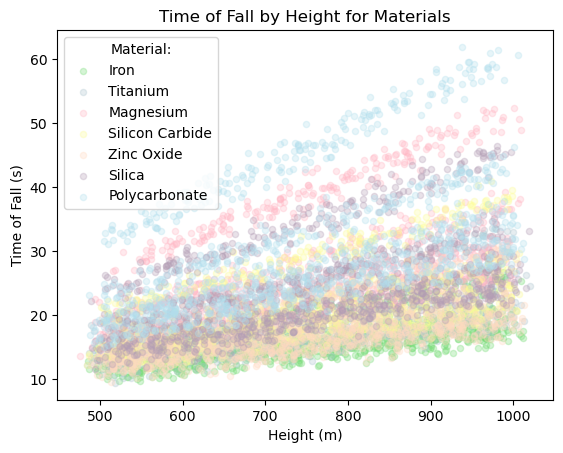

In [987]:
#=================================================================================================================
# Part 1: Reading and verifying data
# b)

# plotting the data

%matplotlib inline

# time and height are plotted for all materials
plt.scatter(iron_data[:,5], iron_data[:,6], alpha=0.3, c='#77DD77', s=20, label="Iron")
plt.scatter(titanium_data[:,5], titanium_data[:,6], alpha=0.3, c='#AEC6CF', s=20, label="Titanium")
plt.scatter(magnesium_data[:,5], magnesium_data[:,6], alpha=0.3, c='#FFB7C5', s=20, label="Magnesium")
plt.scatter(silicon_carbide_data[:,5], silicon_carbide_data[:,6], alpha=0.3, c='#FDFD96', s=20, label="Silicon Carbide")
plt.scatter(zinc_oxide_data[:,5], zinc_oxide_data[:,6], alpha=0.3, c='#FFDAC1', s=20, label="Zinc Oxide")
plt.scatter(silica_data[:,5], silica_data[:,6], alpha=0.3, c='#B39EB5', s=20, label="Silica")
plt.scatter(polycarbonate_data[:,5], polycarbonate_data[:,6], alpha=0.3, c='#B2DFEE', s=20, label="Polycarbonate")

plt.xlabel("Height (m)")
plt.ylabel("Time of Fall (s)")
plt.title("Time of Fall by Height for Materials")
plt.legend(title="Material:")


plt.savefig('all_materials_height_time.pdf') # saving as pfd to put in report
plt.show()
plt.close()

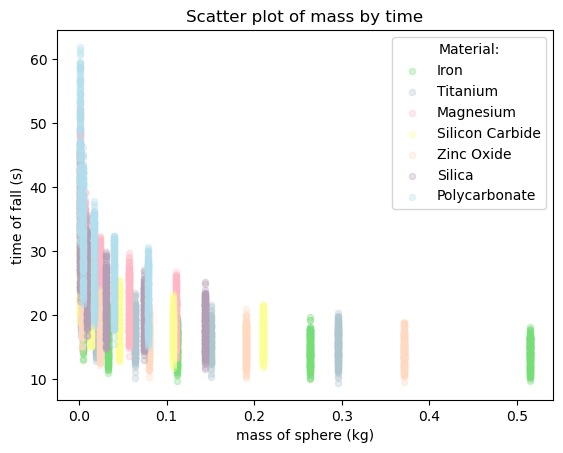

In [988]:
# plot of mass by time for all materials
plt.scatter(iron_data[:,2], iron_data[:,6], alpha=0.3, c='#77DD77', s=20, label="Iron")
plt.scatter(titanium_data[:,2], titanium_data[:,6], alpha=0.3, c='#AEC6CF', s=20, label="Titanium")
plt.scatter(magnesium_data[:,2], magnesium_data[:,6], alpha=0.3, c='#FFB7C5', s=20, label="Magnesium")
plt.scatter(silicon_carbide_data[:,2], silicon_carbide_data[:,6], alpha=0.3, c='#FDFD96', s=20, label="Silicon Carbide")
plt.scatter(zinc_oxide_data[:,2], zinc_oxide_data[:,6], alpha=0.3, c='#FFDAC1', s=20, label="Zinc Oxide")
plt.scatter(silica_data[:,2], silica_data[:,6], alpha=0.3, c='#B39EB5', s=20, label="Silica")
plt.scatter(polycarbonate_data[:,2], polycarbonate_data[:,6], alpha=0.3, c='#B2DFEE', s=20, label="Polycarbonate")

plt.xlabel('mass of sphere (kg)')
plt.ylabel('time of fall (s)')
plt.title('Scatter plot of mass by time')
plt.legend(title="Material:")
plt.savefig('all_materials_mass_time.pdf') # saving as pfd to put in report
plt.show()
plt.close()

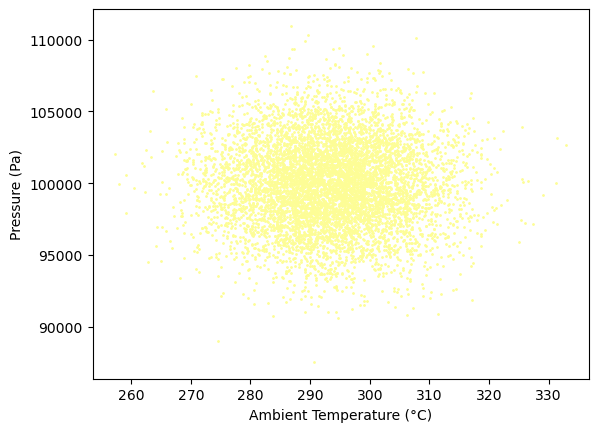

In [989]:
# plot of temperature by pressure for all materials
plt.scatter(temperature, pressure, c='#FDFD96', s=1)
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('Pressure (Pa)')
plt.savefig('all_materials_temp_press.pdf') # saving as pfd to put in report
plt.show()
plt.close()

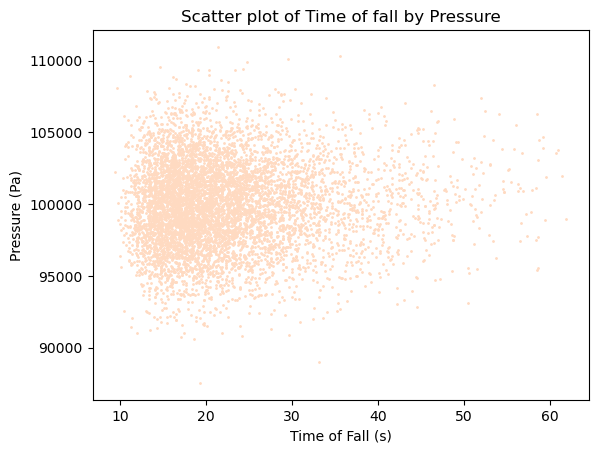

In [990]:
plt.scatter(time, pressure, c='#FFDAC1', s=1)
plt.xlabel('Time of Fall (s)')
plt.ylabel('Pressure (Pa)')
plt.title('Scatter plot of Time of fall by Pressure')
plt.savefig('all_materials_time_press.pdf') # saving as pfd to put in report
plt.show()
plt.close()

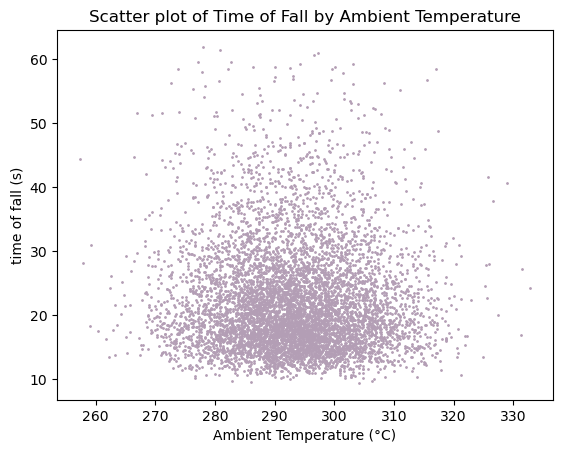

In [991]:
plt.scatter(temperature, time, c='#B39EB5', s=1)
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('time of fall (s)')
plt.title('Scatter plot of Time of Fall by Ambient Temperature')
plt.savefig('all_materials_time_temp.pdf') # saving as pfd to put in report
plt.show()
plt.close()

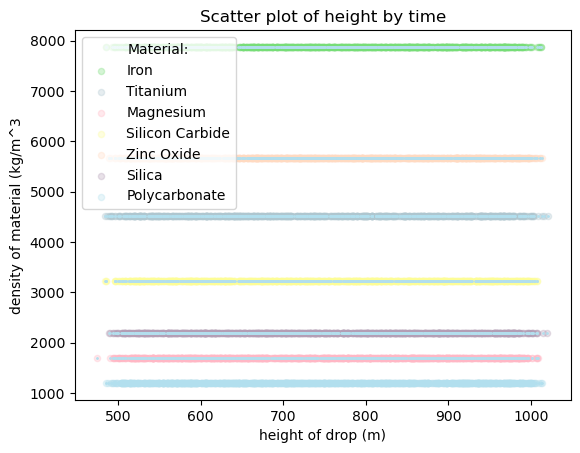

In [992]:
plt.scatter(iron_data[:,5], iron_data[:,0], alpha=0.3, c='#77DD77', s=20, label="Iron")
plt.scatter(titanium_data[:,5], titanium_data[:,0], alpha=0.3, c='#AEC6CF', s=20, label="Titanium")
plt.scatter(magnesium_data[:,5], magnesium_data[:,0], alpha=0.3, c='#FFB7C5', s=20, label="Magnesium")
plt.scatter(silicon_carbide_data[:,5], silicon_carbide_data[:,0], alpha=0.3, c='#FDFD96', s=20, label="Silicon Carbide")
plt.scatter(zinc_oxide_data[:,5], zinc_oxide_data[:,0], alpha=0.3, c='#FFDAC1', s=20, label="Zinc Oxide")
plt.scatter(silica_data[:,5], silica_data[:,0], alpha=0.3, c='#B39EB5', s=20, label="Silica")
plt.scatter(polycarbonate_data[:,5], polycarbonate_data[:,0], alpha=0.3, c='#B2DFEE', s=20, label="Polycarbonate")
plt.scatter(height, density, c='#B2DFEE', s=1)
plt.ylabel('density of material (kg/m^3')
plt.xlabel('height of drop (m)')
plt.title('Scatter plot of height by time')
plt.legend(title="Material:")
plt.show()

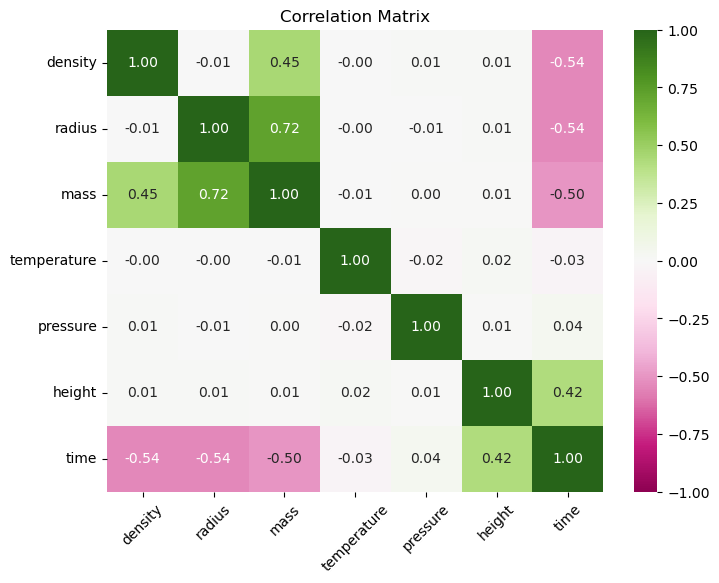

In [993]:
#=================================================================================================================
#Part 2: Correlation matrix
#

# compiling all the variables data to evaluate the correlations between them
compiled_data = [density, radius, mass, temperature, pressure, height, time]

# evaluating the Pearson product-moment correlation coefficients
correlation = np.corrcoef(compiled_data)

# labels for each variable
labels = ["density", "radius", "mass", "temperature", "pressure", "height", "time"]

plt.figure(figsize=(8, 6)) # enlarging the plot

# plotting the correlation matrix as a heat map, annot=True and fmt=".2f" puts the correlation 
# values inside each box to 2 decimal places. 
# A diverging colour map is chosen so more vibrent colour displays a stronger correlation.
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="PiYG", xticklabels=labels, yticklabels=labels, vmin=-1, vmax=1)

plt.xticks(rotation=45) # slanting the x-axis labels

plt.title("Correlation Matrix") # adding a title

plt.savefig('correlation_matrix.pdf') # saving as pfd to put in report
plt.show()
plt.close()


In [994]:
#=================================================================================================================
#Part 3: Multiple linear regression
# a)

# converting lists of variables to numpy arrays
# column_stack puts the 6 lists of variables into columns to fit the expected formatting for the linear regression fit 
x = np.column_stack((density, radius, mass, temperature, pressure, height)) # independent variables, feature maxrix
y = np.array(time)  # dependent variable

scaler = StandardScaler()
features_scaled = scaler.fit_transform(x)

# setting up the model
model = linear_model.LinearRegression()

# fitting the model to the features and time
model.fit(features_scaled, y)

# retrieving the intercept and coefficients produced
beta_coeff = model.coef_
beta_0 = model.intercept_

# using the model to predict the variables and calculating mean squared error from this
model_prediction = model.predict(features_scaled)
mse = mean_squared_error(y, model_prediction)

# printing beta coefficients
print(f"β0, Intercept: {beta_0:.3f}")
for i, j in enumerate(["Density", "Radius", "Mass", "Temperature", "Pressure", "Height"]):
    print(f"β{i+1}, {j}: {beta_coeff[i]:.3f}")

print(f"Mean Squared Error: {mse:.3f}")

β0, Intercept: 22.220
β1, Density: -6.366
β2, Radius: -7.490
β3, Mass: 4.046
β4, Temperature: -0.352
β5, Pressure: 0.275
β6, Height: 3.638
Mean Squared Error: 10.543


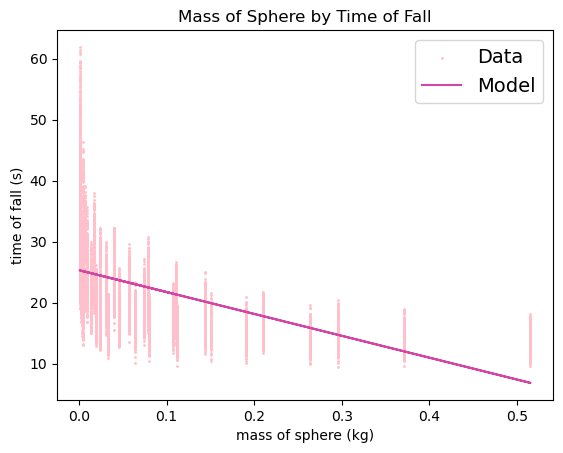

Mean Squared Error: 51.2465


In [995]:
#=================================================================================================================
#Part 3: Multiple linear regression
# a)

# Plotting 

# to plot mass by time, for both the data and the fitted function:
mass = np.array(mass).reshape(-1,1)
model_mass_time = linear_model.LinearRegression()
model_mass_time.fit(mass, time)

# using the model to produce expected time values
time_prediction = model_mass_time.predict(mass)

plt.scatter(mass, time, c='pink', s=1, label = 'Data') 
plt.plot(mass, time_prediction, c='#D147A3', label = 'Model')
plt.xlabel('mass of sphere (kg)')
plt.ylabel('time of fall (s)')
plt.title('Mass of Sphere by Time of Fall')
plt.legend(fontsize = 14)
plt.show()

# error in the fit by the Mean Squared Error loss function
mse = mean_squared_error(time, time_prediction)
print(f"Mean Squared Error: {mse:.4f}") # printing error to 4 decimal places

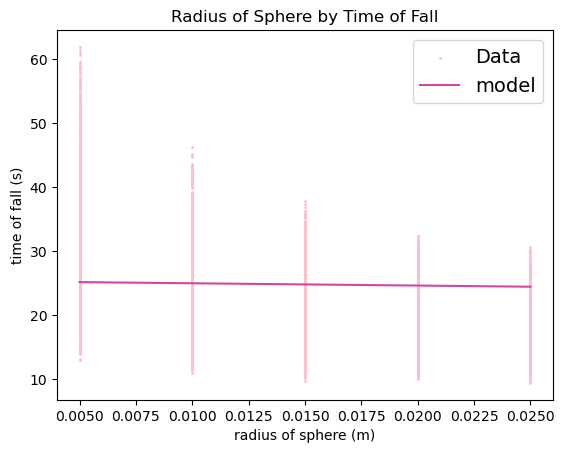

Mean Squared Error: 73.1724


In [996]:
radius = np.array(radius).reshape(-1,1)
model_radius_time = linear_model.LinearRegression()
model_radius_time.fit(radius, time)

time_prediction = model_mass_time.predict(radius)

plt.scatter(radius, time, c='pink', s=1, label = 'Data') 
plt.plot(radius, time_prediction, c='#D147A3', label = 'model')
plt.xlabel('radius of sphere (m)')
plt.ylabel('time of fall (s)')
plt.title('Radius of Sphere by Time of Fall')
plt.legend(fontsize = 14)
plt.show()

# error in the fit by the Mean Squared Error loss function
mse = mean_squared_error(time, time_prediction)
print(f"Mean Squared Error: {mse:.4f}") # printing error to 4 decimal place

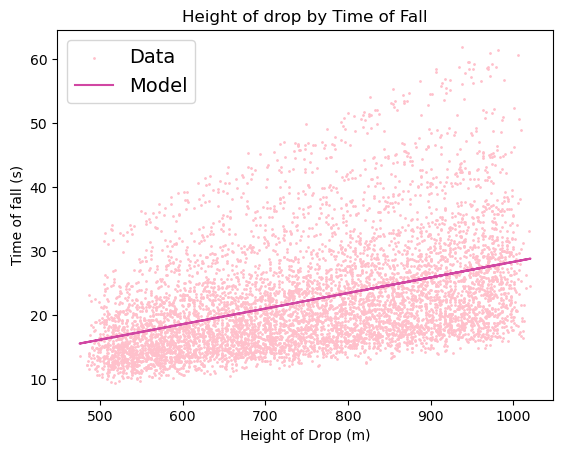

Mean Squared Error: 56.3449


In [997]:
height = np.array(height).reshape(-1,1)
model_height_time = linear_model.LinearRegression()
model_height_time.fit(height, time)
time_prediction = model_height_time.predict(height)

plt.scatter(height, time, c='pink', s=1, label = 'Data') 
plt.plot(height, time_prediction, c='#D147A3', label = 'Model')



plt.xlabel('Height of Drop (m)')
plt.ylabel('Time of fall (s)')
plt.title('Height of drop by Time of Fall')
plt.legend(fontsize = 14)
plt.show()

# error in the fit by the Mean Squared Error loss function
mse = mean_squared_error(time, time_prediction)
print(f"Mean Squared Error: {mse:.4f}") # printing error to 4 decimal places

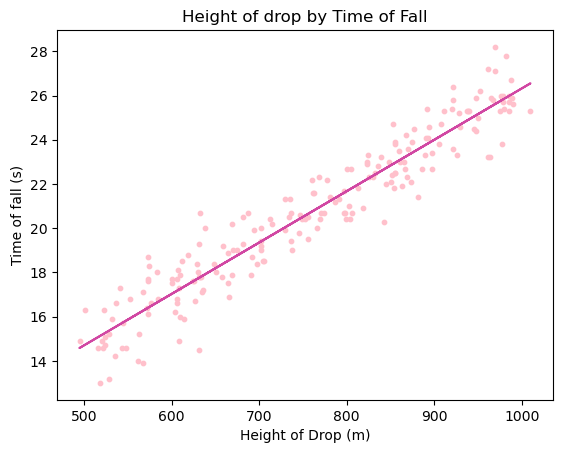

In [998]:
# plot of only only iron with radius = 0.005m

# filtering iron data to specific radius
iron_r1_data = iron_data[iron_data[:, 1] == 0.005]
height_r1 = iron_r1_data[:, 5].reshape(-1, 1)  
time_r1 = iron_r1_data[:, 6]  # Select time column

# fitting model
height_model = linear_model.LinearRegression()
height_model.fit(height_r1, time_r1)

# predicting time values
iron_predicted_time_r1 = height_model.predict(height_r1)

# plotting results
plt.plot(iron_x_r1[:,5], iron_predicted_time_r1,  c='#D147A3', label = 'Model')
plt.scatter(iron_r1_data[:,5], iron_r1_data[:,6], c='pink', s=10,  label = 'Data')
plt.xlabel('Height of Drop (m)')
plt.ylabel('Time of fall (s)')
plt.title('Height of drop by Time of Fall')
plt.savefig('height_time_model.pdf') # saving as pfd to put in report
plt.show()
plt.close()

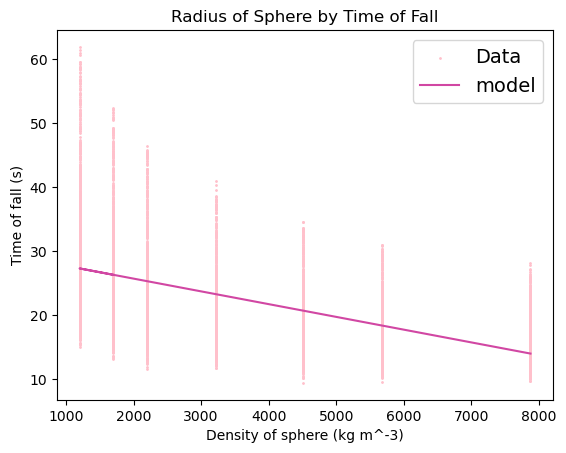

Mean Squared Error: 48.7515


In [1000]:
density = np.array(density).reshape(-1,1)
model_density_time = linear_model.LinearRegression()
model_density_time.fit(density, time)

time_prediction = model_density_time.predict(density)

plt.scatter(density, time, c='pink', s=1, label = 'Data') 
plt.plot(density, time_prediction, c='#D147A3', label = 'model')
plt.xlabel('Density of sphere (kg m^-3)')
plt.ylabel('Time of fall (s)')
plt.title('Radius of Sphere by Time of Fall')
plt.legend(fontsize = 14)
plt.savefig('radius_time_model.pdf') # saving as pfd to put in report
plt.show()
plt.close()

# error in the fit by the Mean Squared Error loss function
mse = mean_squared_error(time, time_prediction)
print(f"Mean Squared Error: {mse:.4f}") # printing error to 4 decimal places

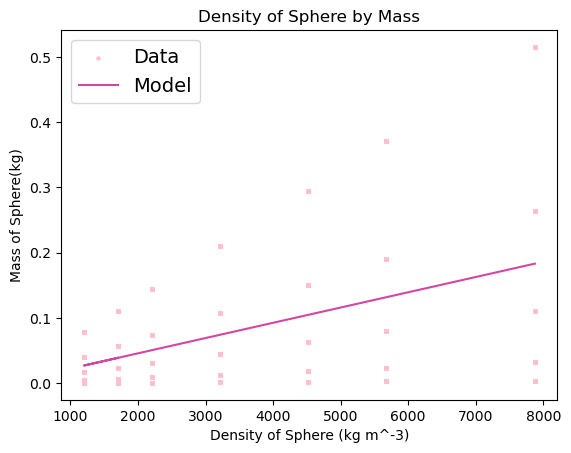

Mean Squared Error: 48.7515


In [1001]:
density = np.array(density).reshape(-1,1)
model_density_mass = linear_model.LinearRegression()
model_density_mass.fit(density, mass)

mass_prediction = model_density_mass.predict(density)

plt.scatter(density, mass, c='pink', s=5, label = 'Data') 
plt.plot(density, mass_prediction, c='#D147A3', label = 'Model')
plt.xlabel('Density of Sphere (kg m^-3)')
plt.ylabel('Mass of Sphere(kg)')
plt.title('Density of Sphere by Mass')
plt.legend(fontsize = 14)
plt.show()

# error in the fit by the Mean Squared Error loss function
mse = mean_squared_error(time, time_prediction)
print(f"Mean Squared Error: {mse:.4f}") # printing error to 4 decimal places

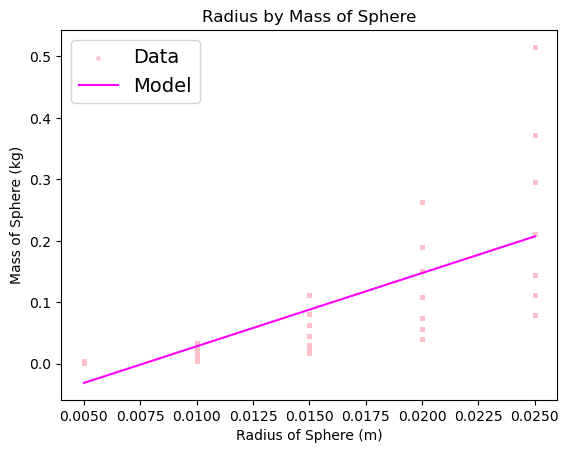

Mean Squared Error: 48.7515


In [1002]:
radius = np.array(radius).reshape(-1,1)
model_radius_mass = linear_model.LinearRegression()
model_radius_mass.fit(radius, mass)

mass_prediction = model_radius_mass.predict(radius)

plt.scatter(radius, mass, c='pink', s=5, label = 'Data') 
plt.plot(radius, mass_prediction, c='magenta', label = 'Model')
plt.xlabel('Radius of Sphere (m)')
plt.ylabel('Mass of Sphere (kg)')
plt.title('Radius by Mass of Sphere')
plt.legend(fontsize = 14)
plt.show()

# error in the fit by the Mean Squared Error loss function
mse = mean_squared_error(time, time_prediction)
print(f"Mean Squared Error: {mse:.4f}") # printing error to 4 decimal places

In [1033]:
#=================================================================================================================
#Part 3: Multiple linear regression
# b) 

# using 2 other loss function available in scikit-learn, the ridge and lasso models:

# setting up the sidge model by adapting earlier code
ridge_model = Ridge( ) 
ridge_model.fit(features_scaled,y)

# setting up lasso model
lasso_model = Lasso()
lasso_model.fit(features_scaled,y)

# calculating the mean squared error of each model to compare
ridge_mse = mean_squared_error(y, ridge_model.predict(features_scaled))
print(f"Mean Squared Error of Ridge Model: {ridge_mse:.4f}") # printing error to 4 decimal places

lasso_mse =  mean_squared_error(y, lasso_model.predict(features_scaled))
print(f"Mean Squared Error of Lasso Model: {lasso_mse:.4f}") # printing error to 4 decimal places

Mean Squared Error of Ridge Model: 10.5429
Mean Squared Error of Lasso Model: 18.3170


In [1081]:
# extracting beta coefficients of the ridge model to compare to linear regression model
ridge_beta_coeff = ridge_model.coef_.reshape(-1,1)
ridge_beta_0 = ridge_model.intercept_

print(f"Ridge Coefficients:")
print(f"β0, Intercept: {float(ridge_beta_0[0]):.3f}")
for i, j in enumerate(["Density", "Radius", "Mass", "Temperature", "Pressure", "Height"]):
    #print(f"β{i+1}, {j}: {ridge_beta_coeff[i]:.3f}")
    print(f"β{i+1}, {j}: {ridge_beta_coeff[i].item():.3f}")


Ridge Coefficients:
β0, Intercept: 22.220
β1, Density: -6.362
β2, Radius: -7.484
β3, Mass: 4.040
β4, Temperature: -0.352
β5, Pressure: 0.275
β6, Height: 3.638


In [1083]:
# extracting beta coefficients of the lasso model for comparison
lasso_beta_coeff = lasso_model.coef_.reshape(-1,1)
lasso_beta_0 = lasso_model.intercept_

print(f"Lasso Coefficients:")
print(f"β0, Intercept: {float(lasso_beta_0[0]):.3f}")
for i, j in enumerate(["Density", "Radius", "Mass", "Temperature", "Pressure", "Height"]):
    print(f"β{i+1}, {j}: {lasso_beta_coeff[i].item():.3f}")

Lasso Coefficients:
β0, Intercept: 22.220
β1, Density: -3.514
β2, Radius: -3.546
β3, Mass: -0.000
β4, Temperature: -0.000
β5, Pressure: 0.000
β6, Height: 2.593


In [1006]:
#=================================================================================================================
#Part 3: Multiple linear regression
# c)
# batch method
#

np.random.seed(10) # ensures that the random number generation is deterministic

# adding extra column to x the data matrix for beta_o which is set to 1 for every data point
X = np.c_[np.ones((len(y), 1)), x] 

y = y.reshape(-1, 1)

# standardizing the data matrix X

X_int = X[:,0]
X_to_standardize = X[:, 1:] 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_to_standardize)
X = np.c_[X_int, X_scaled]

eta = 0.001  # Learning rate
n_iterations = 10000  # Number of gradient descent steps
m = len(y)  # Number of samples in the dataset

# empty array to store the path of beta
beta_path_bgd = []

# represents the 7 beta coefficients, at first randomly guessed 
beta = np.random.randn(7,1) 

for iteration in range(n_iterations):
    gradients = 2/m * X.T.dot(X.dot(beta) - y) # eq (6) on Ex3 sheet
    beta = beta - eta * gradients  # moves theta in the direction of the negative gradient, eq (7) on Ex3 sheet
    beta_path_bgd.append(beta)

beta_path_bgd = np.array(beta_path_bgd) #save the path

beta_bgd = beta # beta coefficients result for batch method

# calculating MSE
loss_bgd = np.mean((X.dot(beta_bgd) - y)**2)

print(f"Batch MSE: {loss_bgd:.3f}")
print()
print(f"Batch GD Coefficients:")
print(f"β0, Intercept: {beta[0][0]:.3f}")
for i, j in enumerate(["Density", "Radius", "Mass", "Temperature", "Pressure", "Height"]):
    print(f"β{i+1}, {j}: {beta[i][0]:.3f}")

Batch MSE: 10.576

Batch GD Coefficients:
β0, Intercept: 22.220
β1, Density: 22.220
β2, Radius: -6.189
β3, Mass: -7.207
β4, Temperature: 3.714
β5, Pressure: -0.352
β6, Height: 0.277


In [1008]:
#=================================================================================================================
#Part 3: Multiple linear regression
# c)
# Stochastic GD
#

np.random.seed(10)
beta = np.random.randn(7,1) 

eta = 0.001

n_iterations = 100000 

beta_path_sgd = []

for epoch in range(n_iterations):
    
        random_index = np.random.randint(m) # pick one example from the data 
        
        x_one = X[random_index:random_index+1]
        
        y_one = y[random_index:random_index+1]
        
        gradients = 2 * x_one.T.dot(x_one.dot(beta) - y_one)
        beta = beta - eta * gradients
        beta_path_sgd.append(beta)                 

beta_path_sgd = np.array(beta_path_sgd)

beta_sgd = beta

loss_sgd = np.mean((X.dot(beta_sgd) - y)**2)

diff = (loss_bgd-loss_sgd)/loss_bgd*100 # percent difference with batch equation

print(f"Stochastic MSE: {loss_sgd:.3f}")
print()
print(f"Percentage difference in MSE to Batch Method: {diff:.3f}%")
print()
print(f"Stochastic GD Coefficients:")
print(f"β0, Intercept: {beta[0][0]:.3f}")
for i, j in enumerate(["Density", "Radius", "Mass", "Temperature", "Pressure", "Height"]):
    print(f"β{i+1}, {j}: {beta[i][0]:.3f}")

Stochastic MSE: 10.632

Percentage difference in MSE to Batch Method: -0.529%

Stochastic GD Coefficients:
β0, Intercept: 22.077
β1, Density: 22.077
β2, Radius: -6.299
β3, Mass: -7.458
β4, Temperature: 4.188
β5, Pressure: -0.330
β6, Height: 0.132


In [1009]:
#=================================================================================================================
#Part 3: Multiple linear regression
# c)
# Mini batch GD
#

np.random.seed(10) # ensures each random guess is in the name ballpark
eta = 0.001
n_iterations = 10000
beta_path_mgd = []
minibatch_size = 10 # size of the mini batch

m_batch = np.random.randn(7,1) # initial random 'guesses' at beta coefficients

for epoch in range(n_iterations):
    
    shuffled_indices = np.random.permutation(m) # shuffle array 
    
    X_shuffled = X[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    xi = X_shuffled[:minibatch_size] # select the first set from the shuffled array to select a random one    
    yi = y_shuffled[:minibatch_size]
    
    gradients = 2/minibatch_size * xi.T.dot(xi.dot(m_batch) - yi)
    
    m_batch = m_batch - eta * gradients
    theta_path_mgd.append(m_batch)

beta_path_mgd = np.array(beta_path_mgd)
beta_mgd = m_batch 

loss_mgd = np.sum(1/m*(X.dot(beta_mgd) - y)**2) # MSE calculation
diff = (loss_bgd-loss_sgd)/loss_bgd*100 # percent difference with batch equation

print(f"Mini-Batch MSE: {loss_mgd:.3f}")
print()
print(f"Percentage difference in MSE to Batch Method: {diff:.3f}%")
print()
print(f"Mini-Batch GD Coefficients:")
print(f"β0, Intercept: {m_batch[0][0]:.3f}")
for i, j in enumerate(["Density", "Radius", "Mass", "Temperature", "Pressure", "Height"]):
    print(f"β{i+1}, {j}: {m_batch[i][0]:.3f}")

Mini-Batch MSE: 10.571

Percentage difference in MSE to Batch Method: -0.529%

Mini-Batch GD Coefficients:
β0, Intercept: 22.268
β1, Density: 22.268
β2, Radius: -6.226
β3, Mass: -7.274
β4, Temperature: 3.776
β5, Pressure: -0.345
β6, Height: 0.260


In [1010]:
#=================================================================================================================
#Part 4: Model verification
# a)

# dividing data into training and testing datasets, 10% of data goes to the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
model.fit(X_train, y_train) # fitting the model to the training data set

# storing the beta coefficients and intercept from this model
betas = model.coef_.reshape(-1,1)
intercept = model.intercept_

# predicted time calculated by each feature multiplied by the corresponding beta coefficient plus the intercept
# equivolent of equation (3) and (4) in Ex3 sheet
predicted_values = X_test.dot(betas) + intercept

# residuals is the deviation in predicted and actual time values
residuals = predicted_values - y_test 
# the squared deviation between experiment and prediction, so squared residuals
squared_deviation = residuals**2 

# standard deviation equation
standard_deviation = 1/len(y_test) * np.sum((residuals - np.mean(residuals))**2)

print(f"Standard Deviation of Time Residuals: {standard_deviation:.3f}")
print()
print(f"Mean of Time Residuals: {np.mean(residuals):.3f}")

Standard Deviation of Time Residuals: 11.181

Mean of Time Residuals: -0.038


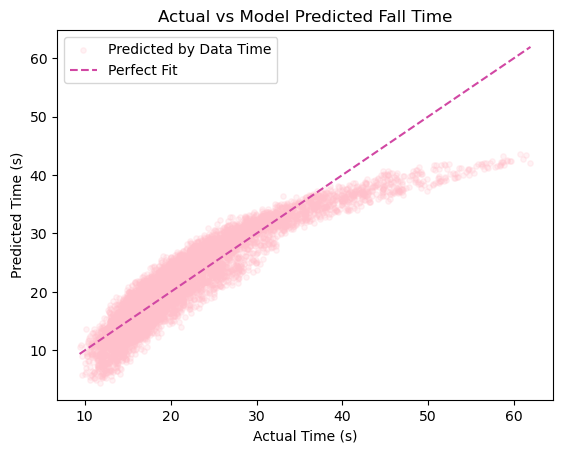

In [1012]:
# plot of actual experiment time of fall by predicted time of fall from fitted model
plt.scatter(time, model_prediction, alpha = 0.2, c='pink', s=15,  label="Predicted by Data Time")
plt.plot([min(time), max(time)], [min(time), max(time)], linestyle='--', color='#D147A3', label="Perfect Fit")

plt.xlabel("Actual Time (s)")
plt.ylabel("Predicted Time (s)")
plt.legend()
plt.title("Actual vs Model Predicted Fall Time")
plt.savefig('actual_vs_predicted_time.pdf') # saving as pdf to put in report
plt.show()
plt.close()

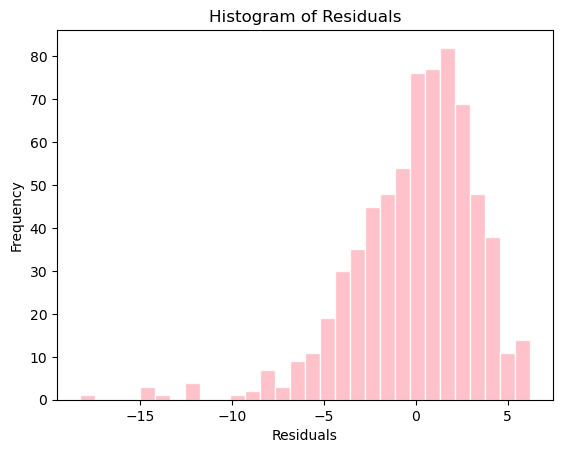

In [1013]:
# histogram of residuals, this being the difference between predicted and actual time of fall values
plt.hist(residuals, bins=30, color='#FFB6C1', edgecolor='white', alpha=0.85)

plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Histogram of Residuals")
plt.savefig('histogram_residuals.pdf') # saving as pfd to put in report
plt.show()
plt.close()

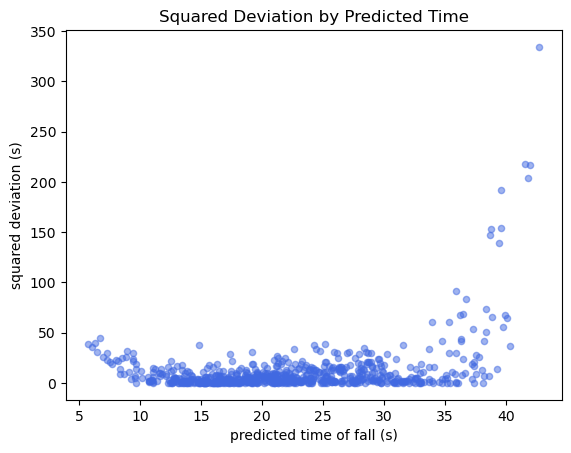

In [1014]:
# plot of squared deviation between predicted and experiment time by predicted Time
plt.scatter( predicted_values, squared_deviation, alpha = 0.5, c='royalblue', s=20)
plt.xlabel('predicted time of fall (s)')
plt.ylabel('squared deviation (s)')
plt.title('Squared Deviation by Predicted Time')
plt.show()

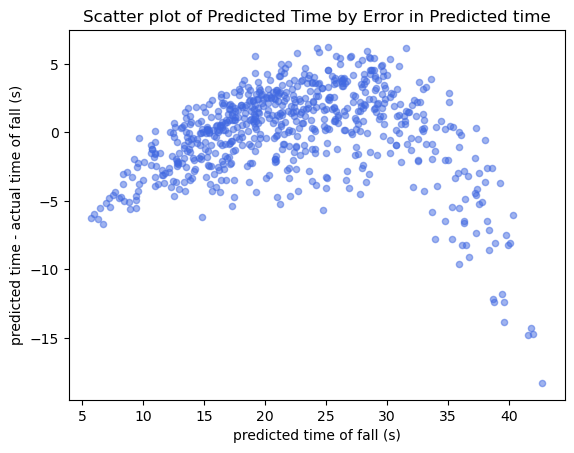

In [1016]:
plt.scatter(predicted_values, residuals, alpha = 0.5, c='royalblue', s=20)
plt.xlabel('predicted time of fall (s)')
plt.ylabel('predicted time - actual time of fall (s)')
plt.title('Scatter plot of Predicted Time by Error in Predicted time')
plt.show()

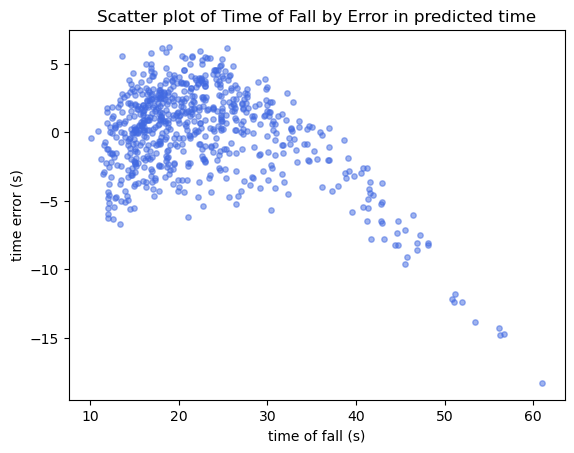

In [1017]:
plt.scatter(y_test, residuals, alpha = 0.5, c='royalblue', s=15)
plt.xlabel('time of fall (s)')
plt.ylabel('time error (s)')
plt.title('Scatter plot of Time of Fall by Error in predicted time')
plt.show()

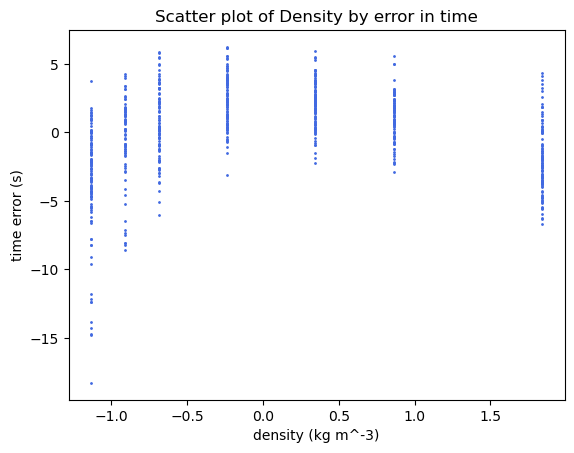

In [1018]:
plt.scatter(X_test[:,1], residuals, c='royalblue', s=1)
plt.xlabel('density (kg m^-3)')
plt.ylabel('time error (s)')
plt.title('Scatter plot of Density by error in time')
plt.show()

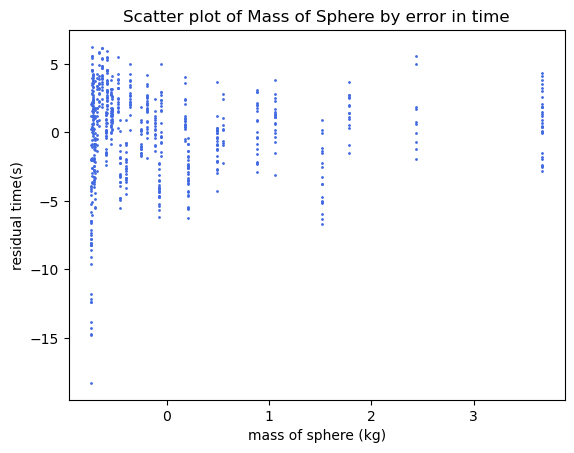

In [1020]:
plt.scatter(X_test[:,3], residuals, c='royalblue', s=1)
plt.xlabel('mass of sphere (kg)')
plt.ylabel('residual time(s)')
plt.title('Scatter plot of Mass of Sphere by error in time')
plt.show()

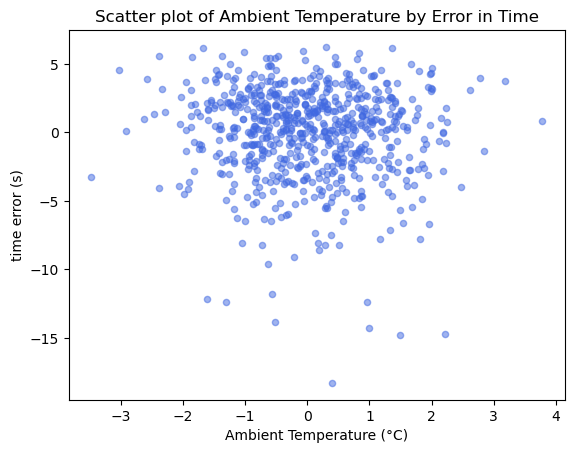

In [1021]:
plt.scatter(X_test[:,4], residuals, alpha = 0.5, c='royalblue', s=20)
plt.xlabel('Ambient Temperature (°C)')
plt.ylabel('time error (s)')
plt.title('Scatter plot of Ambient Temperature by Error in Time')
plt.show()

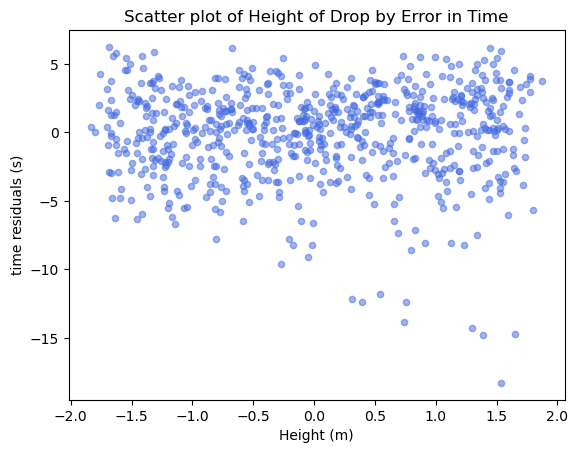

In [1022]:
plt.scatter(X_test[:,6], residuals, alpha = 0.5, c='royalblue', s=20)
plt.xlabel('Height (m)')
plt.ylabel('time residuals (s)')
plt.title('Scatter plot of Height of Drop by Error in Time')
plt.savefig('height_by_residuals.pdf') # saving as pfd to put in report
plt.show()
plt.close()

In [1023]:
#=================================================================================================================
#Part 4: Model verification
# b)

# molar mass of dry air
M = 0.0289652 # kg.mol^-1

# molar gas constant
R = 8.314462 #J K^-1 mol^-1

# drag coefficient for sphere
C_d = 0.47

# acceleration due to gravity
g = 9.81 # m s^-2

radius = np.array(radius) # converting list to array
A = [] # empty list to store cross sectional area
p_0 = [] # empty list to store air density
k = [] # empty list to store drag coefficient
time_theoretical = [] # empty list to store calculated time of fall 

h = np.linspace(0, 2000, int(len(radius)))

for i in range(len(radius)): # running through every data point

    A.append(np.pi * radius[i]**2) # computes cross sectional area of the sphere and stores in 'A'
    
    p_0.append((pressure[i]*M) / (R*temperature[i])) # computes air pressure and stores it

    k.append( (C_d*p_0[i]*A[i]) / 2 ) # computes drag coefficient and stores it
    
    # calculated the time of fall for data point [i] with specified height h
    time_theoretical.append( np.sqrt(mass[i] / (k[i]*g)) *  np.arccosh( np.exp( (h[i]*k[i])/mass[i] ) ) )
time_theoretical = np.array(time_calculated_array)

In [1024]:
# fitting the model to the features and time
model.fit(features_scaled, y)

x_test = np.column_stack((density, radius, mass, temperature, pressure, h))
x_test_scaled = scaler.fit_transform(x_test) # making sure height is also scaled 

t_pred = model.predict(x_test_scaled)  # predict fall times

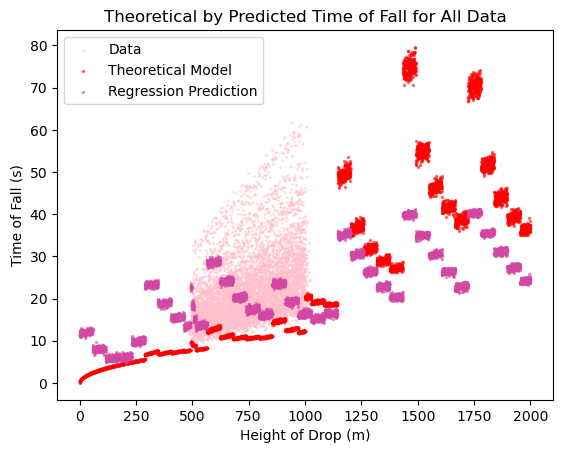

In [1026]:
plt.scatter(height, time, label="Data", alpha = 0.5, color='pink', s=1)
plt.scatter(h, time_theoretical, label="Theoretical Model", alpha = 0.5, color='red', s=2)
plt.scatter(h, t_pred, label="Regression Prediction", alpha = 0.5, color='#D147A3', s=2)
plt.xlabel("Height of Drop (m)")
plt.ylabel("Time of Fall (s)")
plt.legend()
plt.title("Theoretical by Predicted Time of Fall for All Data")
plt.show()

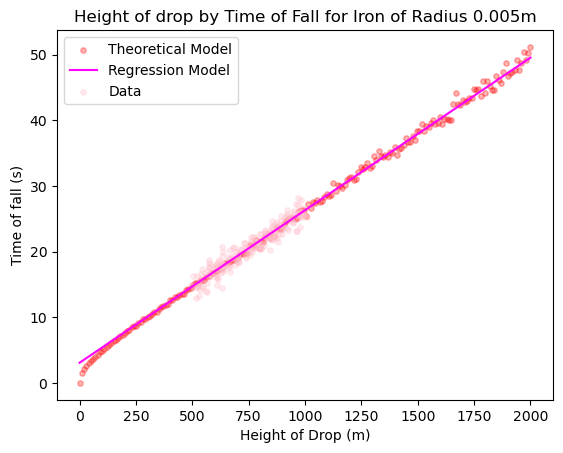

In [1027]:
# h values 
h_iron = np.linspace(0, 2000, int(len(iron_r1_data[:,1])))
h_iron = h_iron.reshape(-1, 1)  

# making an array replacing data height values with h values

iron_r1_x_1 = np.delete(iron_r1_data, 5, axis =1) # stripping height column off
iron_r1_x_2 = np.delete(iron_r1_x_1, 5, axis =1) # stripping time column off

iron_r1_x_test = np.column_stack((iron_r1_x_2, h_iron))

time_r1 = iron_r1_data[:, 6]  # Select time column


# predicting time with model trained with iron data of this radius
iron_predicted_time_r1 = height_model.predict(h_iron)

# theortical time values from equation
time_theoretical_iron = []
for i in range(len(iron_r1_data[:,1])): 

    time_theoretical_iron.append( np.sqrt(mass[i] / (k[i]*g)) *  np.arccosh( np.exp( (h_iron[i]*k[i])/mass[i] ) ) )

# plotting results
plt.scatter(h_iron, time_theoretical_iron, label="Theoretical Model", alpha = 0.3, color='red', s=15)
plt.plot(h_iron, iron_predicted_time_r1,  c='magenta', label = 'Regression Model')
plt.scatter(iron_r1_data[:,5], iron_r1_data[:,6], alpha = 0.3, c='pink', s=15,  label = 'Data')

plt.xlabel('Height of Drop (m)')
plt.ylabel('Time of fall (s)')
plt.title('Height of drop by Time of Fall for Iron of Radius 0.005m')
plt.legend()
plt.savefig('theo_regg_data_ironplot.pdf') # saving as pfd to put in report
plt.show()
plt.close()

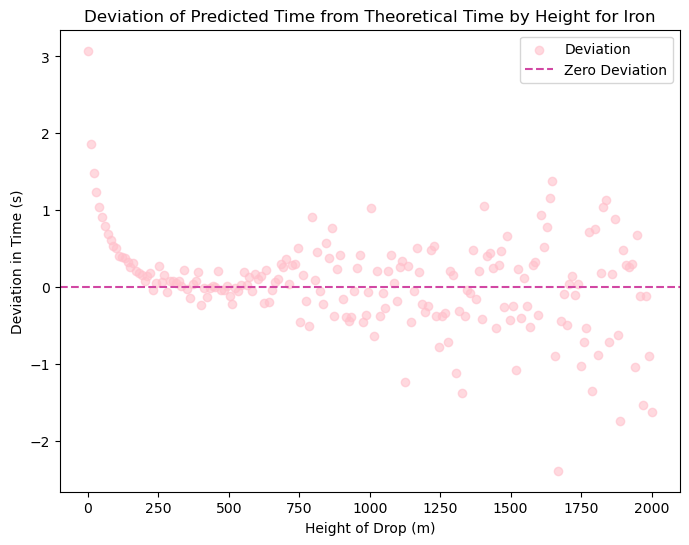

In [1029]:
# deviation between predicted and theoretical time of fall
iron_predicted_time_r1 = np.array(iron_predicted_time_r1)
time_theoretical_iron = np.array(time_theoretical_iron)
deviation = iron_predicted_time_r1.flatten() - time_theoretical_iron.flatten()

# scatter plot of deviation of each data point with height of drop
plt.figure(figsize=(8, 6))
plt.scatter(h_iron, deviation, color='pink', alpha=0.6, label="Deviation")

# line of zero deviation, where theory matches the model perfectly
plt.axhline(y=0, color='#D147A3', linestyle='dashed', label="Zero Deviation")
plt.xlabel("Height of Drop (m)")
plt.ylabel("Deviation in Time (s)")
plt.title("Deviation of Predicted Time from Theoretical Time by Height for Iron")
plt.legend()
plt.savefig('deviation_time_height_line.pdf') # saving as pfd to put in report
plt.show()
plt.close()
